In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# read the data in
df = pd.read_csv("data/Diabetes.csv")
X = df.iloc[:,:8].values     # independent variables
y = df['class'].values     # dependent variables

In [3]:
#Normalize
X = StandardScaler().fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)

In [5]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2017)

In [6]:
clf_DT = DecisionTreeClassifier(random_state=2017).fit(X_train,y_train)
results = cross_val_score(clf_DT, X_train,y_train, cv=kfold)
print ("Decision Tree (stand alone) - Train : ", results.mean())
print ("Decision Tree (stand alone) - Test : ", metrics.accuracy_score(clf_DT.predict(X_test), y_test))

Decision Tree (stand alone) - Train :  0.6969878715180594
Decision Tree (stand alone) - Test :  0.7467532467532467


In [7]:
# Using Bagging Lets build 100 decision tree models and average/majority vote prediction
num_trees = 100
clf_DT_Bag = BaggingClassifier(base_estimator=clf_DT, n_estimators=num_trees, random_state=2017).fit(X_train,y_train)
results = cross_val_score(clf_DT_Bag, X_train, y_train, cv=kfold)
print ("\nDecision Tree (Bagging) - Train : ", results.mean())
print ("Decision Tree (Bagging) - Test : ", metrics.accuracy_score(clf_DT_Bag.predict(X_test), y_test))

/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensembl


Decision Tree (Bagging) - Train :  0.758989737438358
Decision Tree (Bagging) - Test :  0.8181818181818182


***Feature Importance***

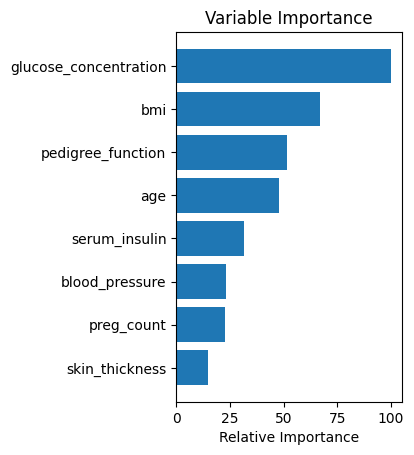

In [8]:
feature_importance = clf_DT.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

***Random Forest***

In [9]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100

X = df.iloc[:,:8].values     # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2017)

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = cross_val_score(clf_RF, X_train, y_train, cv=kfold)

print ("\nRandom Forest - Train : ", results.mean())
print ("Random Forest - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))


Random Forest - Train :  0.7541250166600026
Random Forest - Test :  0.7922077922077922


***Extremely Randomized Trees***

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

num_trees = 100

X = df.iloc[:,:8].values     # independent variables
y = df['class'].values     # dependent variables

#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2017)

clf_ET = ExtraTreesClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = cross_val_score(clf_ET, X_train, y_train, cv=kfold)

print ("\nExtraTree - Train : ", results.mean())
print ("ExtraTree - Test : ", metrics.accuracy_score(clf_ET.predict(X_test), y_test))


ExtraTree - Train :  0.7394242303078769
ExtraTree - Test :  0.7792207792207793


***How does the decision boudary look?***

Let's perform PCA and consider only two component for easy plotting.

In [15]:
# PCA
X = PCA(n_components=2).fit_transform(X)
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2017)

In [16]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2017)

In [18]:
num_trees = 100
# Dection Tree with 5 fold cross validation
clf_DT = DecisionTreeClassifier(random_state=2017).fit(X_train,y_train)
results = cross_val_score(clf_DT, X_train,y_train, cv=kfold)
print ("Decision Tree (stand alone) - Train : ", results.mean())
print ("Decision Tree (stand alone) - Test : ", metrics.accuracy_score(clf_DT.predict(X_test), y_test))

# Using Bagging Lets build 100 decision tree models and average/majority vote prediction
clf_DT_Bag = BaggingClassifier(base_estimator=clf_DT, n_estimators=num_trees, random_state=2017).fit(X_train,y_train)
results = cross_val_score(clf_DT_Bag, X_train, y_train, cv=kfold)
print ("\nDecision Tree (Bagging) - Train : ", results.mean())
print ("Decision Tree (Bagging) - Test : ", metrics.accuracy_score(clf_DT_Bag.predict(X_test), y_test))

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = cross_val_score(clf_RF, X_train, y_train, cv=kfold)

print ("\nRandom Forest - Train : ", results.mean())
print ("Random Forest  - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))

clf_ET = ExtraTreesClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = cross_val_score(clf_ET, X_train, y_train, cv=kfold)

print ("\nExtraTree - Train : ", results.mean())
print ("ExtraTree - Test : ", metrics.accuracy_score(clf_ET.predict(X_test), y_test))

Decision Tree (stand alone) - Train :  0.5862988138078102
Decision Tree (stand alone) - Test :  0.6168831168831169


/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/kazi/Works/Projects/machine-learning/venv/lib/python3.10/site-packages/sklearn/ensembl


Decision Tree (Bagging) - Train :  0.6547381047580968
Decision Tree (Bagging) - Test :  0.7142857142857143

Random Forest - Train :  0.6612688258030122
Random Forest  - Test :  0.7272727272727273

ExtraTree - Train :  0.6547647607623618
ExtraTree - Test :  0.7207792207792207


/tmp/ipykernel_7287/3232909399.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
/tmp/ipykernel_7287/3232909399.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
/tmp/ipykernel_7287/3232909399.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have pre

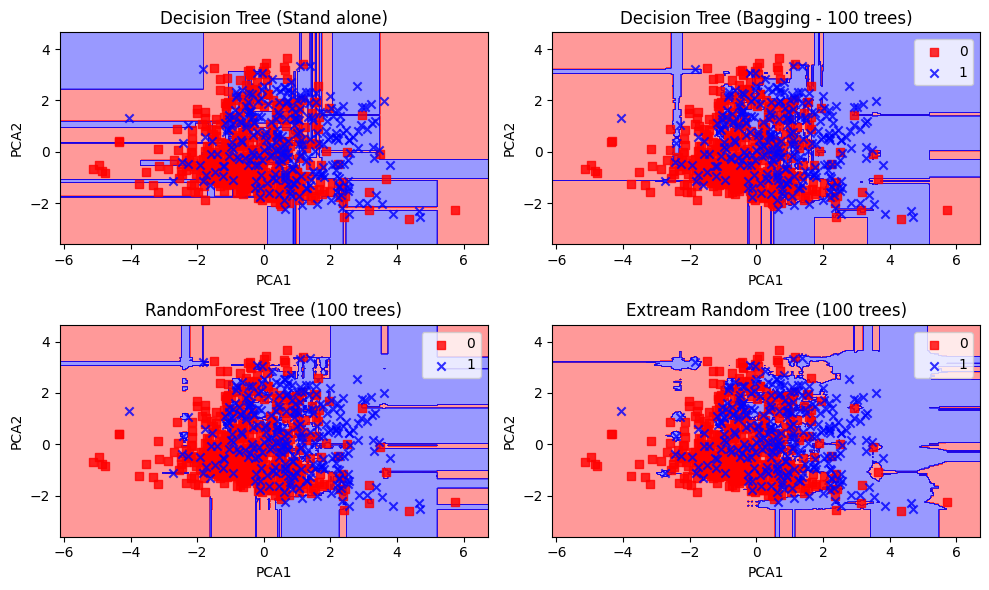

In [19]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

# Plot the decision boundary
plt.figure(figsize=(10,6))
plt.subplot(221)
plot_decision_regions(X, y, clf_DT)
plt.title('Decision Tree (Stand alone)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(222)
plot_decision_regions(X, y, clf_DT_Bag)
plt.title('Decision Tree (Bagging - 100 trees)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')

plt.subplot(223)
plot_decision_regions(X, y, clf_RF)
plt.title('RandomForest Tree (100 trees)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')

plt.subplot(224)
plot_decision_regions(X, y, clf_ET)
plt.title('Extream Random Tree (100 trees)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.tight_layout()